# Assignment 1: Classification

Machine Learning for Finance  
VU Amsterdam    

**Instructors**  

Iman van Lelyveld (iman.van.lelyveld@vu.nl)<br/>
Dieter Wang (d.wang@vu.nl)  

<span style='color:crimson; font-weight: bold'>Submission deadline: 11 Nov 2020, 6pm CET</span>
<img src="https://www.vu.nl/en/Images/VUlogo_Wit_RGB_mettekst_tcm270-835563.svg" width="200" style="position:absolute; top:0; right:20px"/>

## Instructions
* This assignment covers the material discussed in Lectures 3 and 4. 
* Each group submits _only one_ notebook via canvas on the assignment page. 
* The notebook should be named `assignment1_groupXX.ipynb` where `XX` is your group number,  
e.g. for group 3 this will be `assignment1_group03.ipynb`.
* The notebook should run without raising any errors. 
* We recommend keeping the folder structure
```
assignment/
    data/
    lib/
    assignment1_groupXX.ipynb
```
* We strongly recommend git, as you are encouraged to collaborate and split up the work and maybe even start independently. Setup you own GitLab repository and invite each other to it.
* Do not spend time on optimizing the speed of your code. However, if it runs for more than 5 minutes, we will terminate it.
* We strongly encourage you to experiment, try different approaches and combinations and get to know the problem from alternative angles. But the final notebook should only contain the necessary results for grading.

## Introduction

In [43]:
# Import all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

What determines credit ratings?

In this assignment you will classify country ratings based on observable charateristics. We use the Standard & Poor's Long-term bond ratings (AAA+ to D) for 108 countries. We do not use them directly but instead transform them into [EU Credit Quality Step](https://en.wikipedia.org/wiki/Credit_rating#Corporate_credit_ratings) ranging from 1 (AAA+) to 6 (D). This is stored in the column `cqs`. To facilitate the classification task, we further subdivide them into 
* `cqs_group3` has the values `rating_high=1`,`rating_medium=2` and `rating_low=3`
* `cqs_group2` has the values `rating_high=1` and `rating_low=2`

You can inspect the data to find out how `cqs`, `cqs_group2` and `cqs_group3` relate to each other.

To classify the countries, you will find the seven following features. For background information, you can visit [World Bank's World Feature Story](https://www.worldbank.org/en/news/feature/2018/01/30/the-changing-wealth-of-nations-2018) and more details on [Wealth Accounting](https://datacatalog.worldbank.org/dataset/wealth-accounting).

In [44]:
all_features = {
    'total': 'Total wealth',
    'humancap': 'Human capital',
    'prodcap': 'Produced capital',
    'natcap': 'Natural capital',
    'total_pc': 'Total wealth per capita',
    'humancap_pc': 'Human capital per capita',
    'prodcap_pc': 'Produced capital per capita',
    'natcap_pc': 'Natural capital per capita'
}

Let's load and have a look at the data

In [45]:
path = os.path.join('data','wealth_data.csv')

df_data = pd.read_csv(path)
df_data = df_data.set_index('iso3')

df_data.head(10)

cqs  cqs_group3  cqs_group2         total      humancap       prodcap  \
iso3                                                                          
ALB     5           3           2  1.182953e+11  4.672253e+10  4.219518e+10   
ARE     1           1           1  4.691472e+12  1.777783e+12  9.856993e+11   
ARG     5           3           2  4.558464e+12  2.609368e+12  1.406388e+12   
AUS     1           1           1  1.815782e+13  1.039939e+13  5.548665e+12   
AUT     1           1           1  4.943568e+12  3.079112e+12  1.788800e+12   
AZE     4           2           2  4.413545e+11  7.869222e+10  1.131813e+11   
BEL     1           1           1  5.954414e+12  3.797536e+12  1.890873e+12   
BFA     5           3           2  1.481307e+11  5.750474e+10  2.086651e+10   
BGD     4           2           2  1.211163e+12  7.051593e+11  3.004908e+11   
BGR     3           2           2  4.328695e+11  2.552234e+11  1.130845e+11   

            natcap       total_pc    humancap_pc     prodcap_pc      natcap_pc  
iso3                                                                            
ALB   3.186379e+10   39488.086387   15650.908740   14104.981642   10579.551937  
ARE   1.416344e+12  979273.250690  368311.041999  230607.878950  268297.133986  
ARG   5.678434e+11  116027.316008   66593.335830   35844.364742   14323.367204  
AUS   2.833762e+12  867491.112512  498266.623084  264972.875741  134119.059259  
AUT   1.249364e+11  599975.510021  373973.210461  216868.059929   15198.390025  
AZE   2.332663e+11   49833.720658    9002.137627   13056.724986   26135.541404  
BEL   5.611527e+10  559430.204749  357137.629924  177396.894068    5307.763179  
BFA   7.203709e+10   10575.354027    4021.790239    1505.725046    5215.523456  
BGD   2.300594e+11    8347.141785    4859.025844    2065.068082    1599.668217  
BGR   9.282230e+10   56697.262986   33530.330532   14840.096647   12081.995716

## Preparation

Before we start the analysis, we prepare the data by labelling them correctly and splitting into targets and features. We will start with a binary classification (`cqs_group2`).

In [46]:
target_name = 'cqs_group2'

# `sr_` prefix stands for a pandas Series
sr_targets = df_data.loc[:,target_name]

These targets can take on two values.

In [47]:
label_values = [2,1]
label_names = ['rating_low', 'rating_high']

The features are as described above. Let us use the short names from now on and extract those from the dataset.

In [48]:
selected = list(all_features.keys())
selected

['total',
 'humancap',
 'prodcap',
 'natcap',
 'total_pc',
 'humancap_pc',
 'prodcap_pc',
 'natcap_pc']

In [49]:
# `df_` prefix stands for a pandas DataFrame
df_features = df_data.loc[:,selected]

# Question 1
**10 points**

Import the function `plot_pairwise_scatter` from `lib.plots` and visualize how the variables relate to each other. The function is used as follows
```
plot_pairwise_scatter(sr_targets, df_features, label_values)
```

Describe the data in words. What variables do you expect to be important for the classification? You can argue using economic, financial or statistical arguments. 

Furthermore, do you need to pre-process your data? If so, what type of preprocessing may be appropriate or even necessary here?

In [50]:
from lib.plots import plot_pairwise_scatter

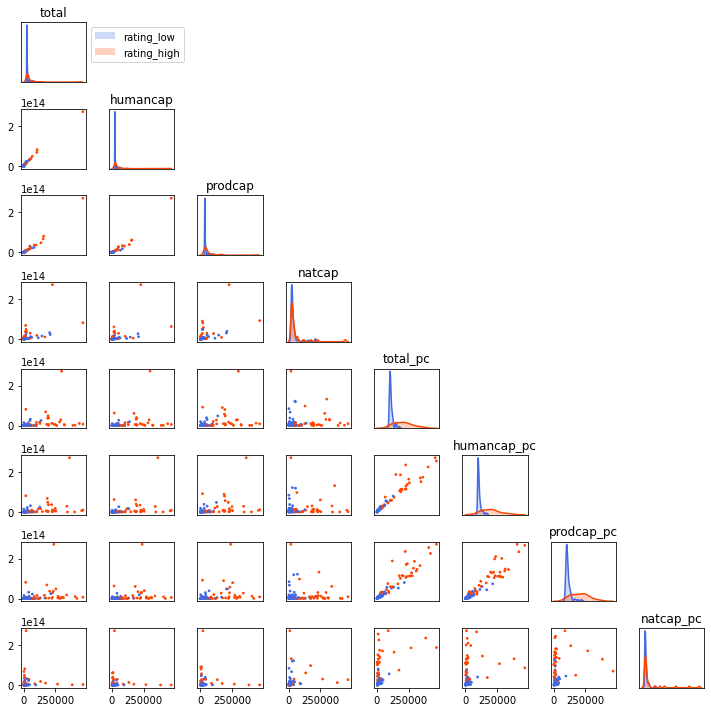

In [51]:
# Return the pairwise scatter of all features
plot_pairwise_scatter(sr_targets, df_features, label_names)

#### Description of the data:
The graphs above show a pattern that is to be expected. We can observe that highly rated countries tend to have higher human capital, wealth etc. per capita, as opposed to countries with lower ratings.

#### Description of graphs:
The scatter plots show the correlation between two dataframe features. On the diagonals the distribution of the variable is displayed. Noticable is that total_pc, humancap_pc and prodcap_pc all have a positive linear correlation with each other. These variables are therefore expected to be more important for the classification.
The variables for which an easy classification between high or low rating can be made are expected to be most important for classification. If we look at the distribution of the low and high rating countries, we can see that for the variables total_pc, humancap_pc and prodcap_pc, the difference between the distribution of both categories is most clear. Therefore these might prove to be important for classification. 

This assertion can also be backed up with economic reasoning. All features are either expressed as the total amount of the particular economy or per capita. As the features expressed per capita provide more information than the total amount for the particular economy, it is expected for the per capita features to have a higher classification power. Furthermore, the natural capital per capita strongly differs between continents and economies. Europe as one of the most developed continents only has very little natural ressources, while Africa as one of the least industrialized continents has very high natural resources but at the same time is much less industrialized than Europe. Northern American countries on the other side have more natural resources than Europe and are more industrialized at the same time. Due to these reasons, the produced capital per capita and the human capital per capita both are expected to contribute more to classify low and high ratings from an economic point of view.

#### Pre-processing: 
With regard to pre-processing, we want to take the log to make the variables more normally distributed. We think that this is necessary for the data to have the properties needed for a correct statistical inference. 



---

# Question 2
**10 points**

Based on your arguments in Question 1, decide for two features. These two features `feature1, feature2` will be your inputs for the subsequent classifications.

Make a plot and describe what a linear classifier is likely to do. What challenges could it run into? 

In [52]:
# Initialize the features
feature1 = df_features.humancap_pc
feature2 = df_features.prodcap_pc

As stated previously, we will now take the log of the features we want to use, since we feel that this may make the variables more normally distributed and thus more easy to work with subsequently. The outcome of this process is shown in the graphs below. We can note that the original distribution of the variables was heavily positively skewed (which makes sense from an economic perspective, since there will be a few extremely positive outliers with this feature), and that the distribution of the log transformed variables look more normally distributed. Thus the pre-processing had the desired effect.

In [53]:
# Log-transform the data
df_features["log_humancap_pc"] = np.log(df_features.humancap_pc)
df_features["log_prodcap_pc"] = np.log(df_features.prodcap_pc)
log_feature1 = np.array(df_features.log_humancap_pc)
log_feature2 = np.array(df_features.log_prodcap_pc)

Text(0.5, 0, 'Log of the human Capital per capita')

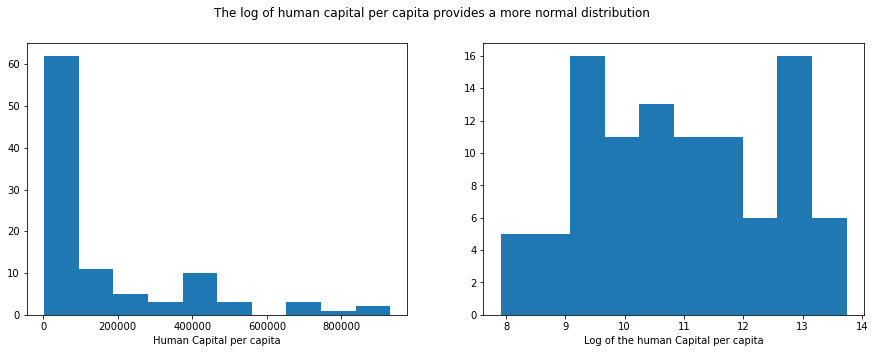

In [54]:
# Plot the distribution of the non-transformed variable against the log-transformed variable
fig, (hg1, hg1log) = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle("The log of human capital per capita provides a more normal distribution")
hg1.hist(feature1)
hg1log.hist(log_feature1)
hg1.set_xlabel('Human Capital per capita')
hg1log.set_xlabel('Log of the human Capital per capita')

Text(0.5, 0, 'Log of the produced capital per capita')

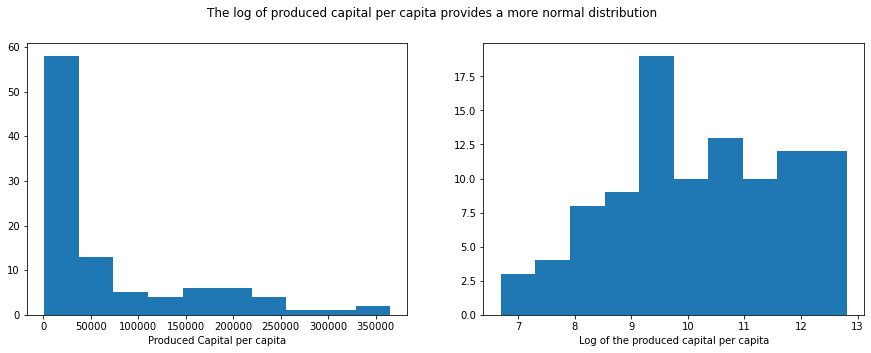

In [55]:
# Plot the distribution of the non-transformed variable against the log-transformed variable
fig, (hg2, hg2log) = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle("The log of produced capital per capita provides a more normal distribution")
hg2.hist(feature2)
hg2log.hist(log_feature2)
hg2.set_xlabel('Produced Capital per capita')
hg2log.set_xlabel('Log of the produced capital per capita')

The dataframe below shows us the effect of the log transformation on the values of the variables.

In [56]:
# Return dataframe
df_features

total      humancap       prodcap        natcap       total_pc  \
iso3                                                                          
ALB   1.182953e+11  4.672253e+10  4.219518e+10  3.186379e+10   39488.086387   
ARE   4.691472e+12  1.777783e+12  9.856993e+11  1.416344e+12  979273.250690   
ARG   4.558464e+12  2.609368e+12  1.406388e+12  5.678434e+11  116027.316008   
AUS   1.815782e+13  1.039939e+13  5.548665e+12  2.833762e+12  867491.112512   
AUT   4.943568e+12  3.079112e+12  1.788800e+12  1.249364e+11  599975.510021   
...            ...           ...           ...           ...            ...   
URY   6.158021e+11  4.200631e+11  1.488954e+11  5.186989e+10  183906.788333   
USA   2.713964e+14  2.128833e+14  5.545615e+13  6.151326e+12  917665.903942   
VEN   3.280725e+12  1.212045e+12  1.111954e+12  9.118521e+11  121786.781650   
VNM   1.712453e+12  9.033363e+11  3.221699e+11  5.583570e+11   20494.225846   
ZAF   3.164218e+12  1.888720e+12  7.952331e+11  5.271506e+11   65656.877750   

        humancap_pc     prodcap_pc      natcap_pc  log_humancap_pc  \
iso3                                                                 
ALB    15650.908740   14104.981642   10579.551937         9.658284   
ARE   368311.041999  230607.878950  268297.133986        12.816683   
ARG    66593.335830   35844.364742   14323.367204        11.106360   
AUS   498266.623084  264972.875741  134119.059259        13.118891   
AUT   373973.210461  216868.059929   15198.390025        12.831939   
...             ...            ...            ...              ...   
URY   125472.280429   44459.708639   15478.756340        11.739840   
USA   720369.642549  186681.016997   20737.767611        13.487520   
VEN    45509.839097   40880.854537   33928.477953        10.725684   
VNM    10865.857817    3815.793137    6660.527263         9.293381   
ZAF    39341.580508   16472.018474   10813.475177        10.580037   

      log_prodcap_pc  
iso3                  
ALB         9.554283  
ARE        12.348474  
ARG        10.486942  
AUS        12.487383  
AUT        12.287044  
...              ...  
URY        10.702339  
USA        12.137157  
VEN        10.618417  
VNM         8.246904  
ZAF         9.709418  

[100 rows x 10 columns]

Text(0.5, 0, 'Log values')

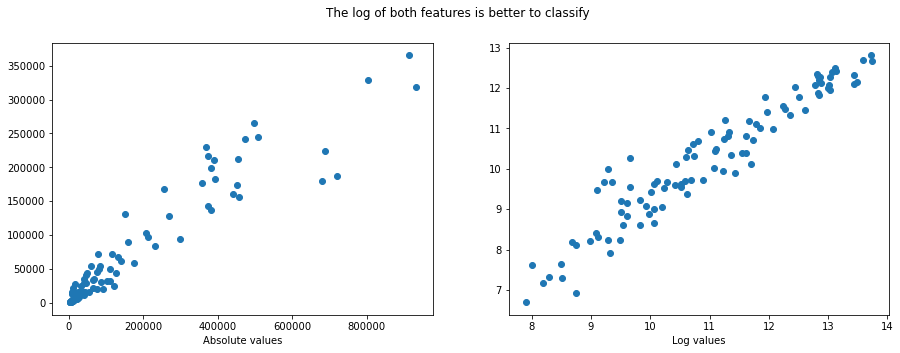

In [57]:
# Plot the non-transformed variables against the log-transformed variables
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle("The log of both features is better to classify")
ax1.scatter(feature1, feature2)
ax2.scatter(log_feature1, log_feature2)
ax1.set_xlabel('Absolute values')
ax2.set_xlabel('Log values')

The two graphs above show the intuition behind why we think that the log variable is more handy to use in this case. We can see with the non-transformed variables that the observations are rather clustered. This may lead to the linear classifier not being able to draw a nice line to seperate the data. On the other hand, the log-transformed variables show that the observations are less clustered, thus we feel that it might be easier to use these variables.

#### What is a linear classifier likely to do?
A linear classifier will try to classify different observations, based on feature values (in our case per capita human capital and produced capital). It makes the classifying decision based on the value of a linear combination of the feature values. Essentially it draws a line based on the linear combination, which it can utilize to classify the different observations at one side of the line vs the other side of the line.  

#### What challenges might occur?
One of the main challenges is the fact, that a linear classifier is unlikely to perfectly classify the observations without falsely classifying certain values. If the number of falsely classified observations is too high, the classification might not significantly exceed a random classification. Another challenge is that a linear classifier will not always be able to draw a line based on the linear combination. Reasons for that might be a high density on certain levels of the observations or an unsatisfying correlation between the features.

---

# Question 3
**15 points**

Use a linear support vector machine from the `sklearn.svm` module and plot the results. 

For the plot, import `plot_classification_contours` from `lib.plots`. Use it like this
```
plot_classification_contours(X, y, clf, [feature1,feature2])
```
where `clf` is the sklearn classifier object. `X` is a numpy array with `[n_obs, n_features]` dimensions and `y` is a numpy array with `[n_obs,]` dimensions.

**Hint:** You can leave the default options of your classifier. But if you decide to adjust them, please give an explanation.

In [58]:
from sklearn.svm import LinearSVC
from lib.plots import plot_classification_contours

In [59]:
# Here we initialize the linear support vector machine, since our model fails to converge with the default number of iterations-
# which is equal to 1000, we decided to increase it until the error message disappeared. Therefore we set out own max iterations.
clf = LinearSVC(max_iter=12000)

In [60]:
# Combine the feature values of observations into an array for the linear SVC
combined_features = np.vstack((log_feature1, log_feature2)).T

X = combined_features #input features
y = np.array(sr_targets) #input labels

# Fit the linear SVC based on the data
clf_fit = clf.fit(X,y)

Figure(432x288)


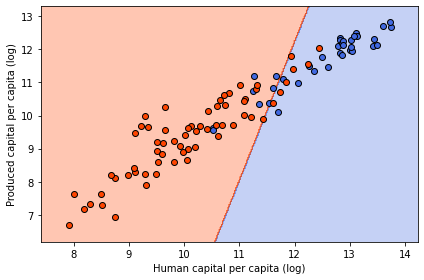

In [61]:
# Plot the result of the linear SVC
print(plot_classification_contours(X, y, clf_fit,["Human capital per capita (log)", "Produced capital per capita (log)"]))

As we can see above, the linear classification model splits the pre-processed data rather well, it is able to draw a line which seperates the high rating observations (indicated with the blue color), from the low rating observations (indicated by the red color).

---

# Question 4
**25 points**

How well did the classification go? 

Make predictions and call them `y_pred`. Write four functions to compute the four elements of a confusion matrix. Name them appropriately and cross check their results with the output of the following plot
```
plot_confusion_matrix(y, y_pred, label_names, normalize=True)
```
Once again, you can import this function from `lib.plots`.

Furthermore, write two functions to compute the precision and recall of your classifier. 

**Hint:** The functions you write should have the following structure:
```
def true_positive(y_true, y_pred):
    # magic
    return TP
```
It is important here that `y_true` and `y_pred` follow the same binary classifications and agree on what's "positive" and whats "negative".

In [20]:
# We first make the predictions based on our model.
y_pred = clf.predict(X)
y_true = np.array(sr_targets)

In [21]:
# Now we design formulas to compute all four elements of the confusion matrix.
def true_positive(y_true, y_pred):
    TP = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] and y_pred[i] == 1:
            TP = TP + 1
    return TP

def false_positive(y_true, y_pred):
    FP = 0
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i] and y_pred[i] == 1:
            FP = FP + 1
    return FP

def true_negative(y_true, y_pred):
    TN = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i] and y_true[i] == 2:
            TN = TN + 1
    return TN

def false_negative(y_true, y_pred):
    FN = 0
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i] and y_pred[i] == 2:
            FN = FN + 1
    return FN

In [22]:
# Now we can construct formulas which will compute the precision and recall of our model.
def precision(y_true, y_pred):
    precision = true_positive(y_true, y_pred)/(true_positive(y_true, y_pred)+false_positive(y_true, y_pred)) 
    return precision

def recall(y_true, y_pred):
    recall = true_positive(y_true, y_pred)/(true_positive(y_true, y_pred)+false_negative(y_true,y_pred))
    return recall

Normalized confusion matrix
[[0.77777778 0.22222222]
 [0.109375   0.890625  ]]


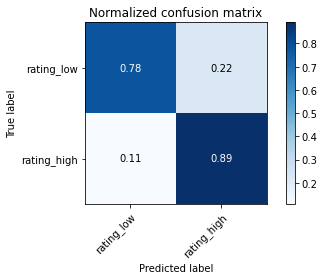

In [23]:
# Now we can setup a confusion matrix with which we can cross-check our formulas and check the predictive capabilities of our model.
from lib.plots import plot_confusion_matrix  
plot_confusion_matrix(y_true, y_pred, label_names, normalize = True)

In [24]:
# Cross-checking the normalized confusion matrix with our formulas.
Left_upper_cell = true_positive(y_true, y_pred)/(true_positive(y_true, y_pred)+false_negative(y_true, y_pred))
Right_upper_cell = false_negative(y_true, y_pred)/(true_positive(y_true, y_pred)+false_negative(y_true, y_pred))
Left_lower_cell = false_positive(y_true, y_pred)/(false_positive(y_true, y_pred)+true_negative(y_true, y_pred))
Right_lower_cell = true_negative(y_true, y_pred)/(false_positive(y_true, y_pred)+true_negative(y_true, y_pred))
print("The left upper cell value, based on our formulas is: "+str(round(Left_upper_cell,8)))
print("The right upper cell value, based on our formulas is: "+str(round(Right_upper_cell,8)))
print("The left lower cell value, based on our formulas is: "+str(round(Left_lower_cell,5)))
print("The right lower cell value, based on our formulas is: "+str(round(Right_lower_cell,5)))

The left upper cell value, based on our formulas is: 0.77777778
The right upper cell value, based on our formulas is: 0.22222222
The left lower cell value, based on our formulas is: 0.10938
The right lower cell value, based on our formulas is: 0.89062


#### How well did the classification go?
Looking at the confusion matrix above, we can see that our fomulas correctly compute all individual elements. Additionally, when we look at the matrix, we can see that our model performs pretty well. Furthermore, the additional metrics of precision and recall are provided below. The precision metric tells us that of all predictions of a low credit rating we have made, approximately 80% are correct (in-sample). The recall metric tells us that our model performs well in predicting the low ratings, while also minimizing the incorrect predictions of a high credit rating (in-sample).

In [25]:
precision_model = precision(y_true, y_pred)
print("The precision of our linear model is: "+str(round(precision_model,4)))
recall_model = recall(y_true, y_pred)
print("The recall of our linear model is: "+str(round(recall_model,4)))

The precision of our linear model is: 0.8
The recall of our linear model is: 0.7778


---

# Question 5
**15 points**

Change the classifier to a radial basis function and discuss the results. Does it do better than the linear classifier? If so, in what respect? If not, why? Is the confusion matrix different?

**Hint:** In sklearn, the `gamma` parameter may need some adjustment, depending on your features.

Figure(432x288)


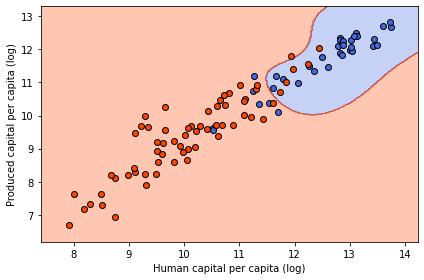

In [26]:
# First we import the needed SVC so that we can change the kernel to a radial basis function
from sklearn.svm import SVC

# Then we intiate the model with the parameters we want, based on our features. Then we fit the model. We chose a gamma of 1.2 -
# since this value fit our data best. However, an out-of-sample test might give better insight into what gamma is appropriate.
rbf_clf = SVC(kernel = 'rbf', gamma = 1.2)
rbf_clf_fit = rbf_clf.fit(X,y_true)

# Plot the result of the classification based on the radial basis function
print(plot_classification_contours(X, y_true, rbf_clf_fit,["Human capital per capita (log)", "Produced capital per capita (log)"]))

Normalized confusion matrix
[[0.80555556 0.19444444]
 [0.078125   0.921875  ]]


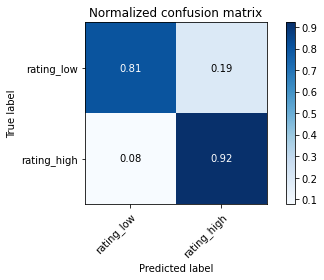

In [27]:
# Now we predict the labels based on our model and compare it to the true labels, with a confusion matrix.
y_pred2 = rbf_clf.predict(X)
plot_confusion_matrix(y_true, y_pred2, label_names, normalize=True)

#### Comparison between the linear classifier and the radial basis function
To answer whether changing from a linear classifier to a radial basis function improved our results, the confusion matrix of both approaches have to be compared. First, we look at the True Positive Rate (TPR): In the radial basis function, the TPR increased from 0.78 to 0.81 indicating that the radial basis function does a better job in correctly classifying high ratings. Second, the True Negative Rate (TNR) has to be compared. When using the radial basis function, the TNR increased from 0.89 to 0.92, i.e. the radial basis function is better in correctly predicting low ratings.
Thus, we can say that, based on the confusion matrix, the radial basis function seems to be a better classifier in our case than the linear classifier.

In [28]:
# We compute the precision and recall of our radial basis function model to compare it to the linear model.
precision_radial = precision(y_true, y_pred2)
print("The precision of our radial basis function model is: "+str(round(precision_radial,4)))
recall_radial = recall(y_true, y_pred2)
print("The recall of our radial basis function model is: "+str(round(recall_radial,4)))

The precision of our radial basis function model is: 0.8529
The recall of our radial basis function model is: 0.8056


When we compare the precision and recall of both models, we see that the radial basis function model has both better precision and better recall. Where the linear model had a precision of 80% and a recall of 77.8%, the radial basis function model has a precision of 85.3% and a recall of 80.56%. Thus based on these measures we may also conclude that the radial basis function model performs better.

---

# Question 6
**15 points**

Let us know consider a third feature `feature3` as an additional predictor variable. Look at the previous pairplot for this purpose and identify a third input.

#### Choice explanation of the third feature
Besides the two features human capital per capita and produced capital per capita, the total capital per capita is going to serve as the third predictor variable. Due to the positive linear correlation between the total capital per capita with the other features as well as the clear differentiation between the distribution of both rating characteristics, adding the total capital per capita as a predictor variable is believed to help classifying between high and low ratings. Since the total capital includes the natural, human, and produced capital of an economy, it contains the information of all the three mentioned features. Again, we take the log of the feature in order to have a more normal distribution as well as a less dense scatter.

In [29]:
# Now we will extend our model by including a third feature. Based on the pairplot provided in Q1, we can see that the variable-
# total_pc is a good candidate. Since the distribution of high and low credit ratings are relatively seperable for this variable.
feature3 = df_features.total_pc

# Taking the log of the variable as a way of pre-processing the data
df_features["log_total_pc"] = np.log(df_features.total_pc)
log_feature3 = np.array(df_features.log_total_pc)

Text(0.5, 0, 'Log of the total wealth per capita')

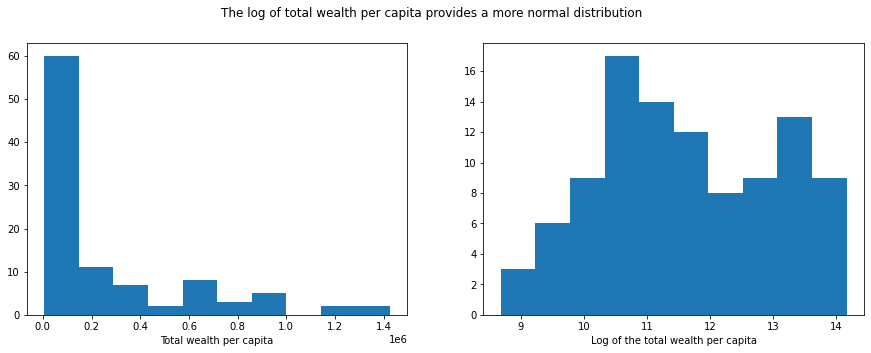

In [30]:
# Plot the distribution of the non-transformed variable against the log-transformed variable.
fig, (hg3, hg3log) = plt.subplots(1,2)
fig.set_size_inches(15,5)
fig.suptitle("The log of total wealth per capita provides a more normal distribution")
hg3.hist(feature3)
hg3log.hist(log_feature3)
hg3.set_xlabel('Total wealth per capita')
hg3log.set_xlabel('Log of the total wealth per capita')

As the graph shows, the distribution of the total wealth per capita (total_pc) is rather skewed. And when we take the log of this variable, the distribution becomes relatively more normally distributed (even though it is still not completely normally distributed).

You can again visualize the three features using 
```
selected = [feature1,feature2,feature3]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_values)
```

Use this new feature and rerun the classification. Does the new feature improve the predictions, or is it possible that it does worse? Please explain.

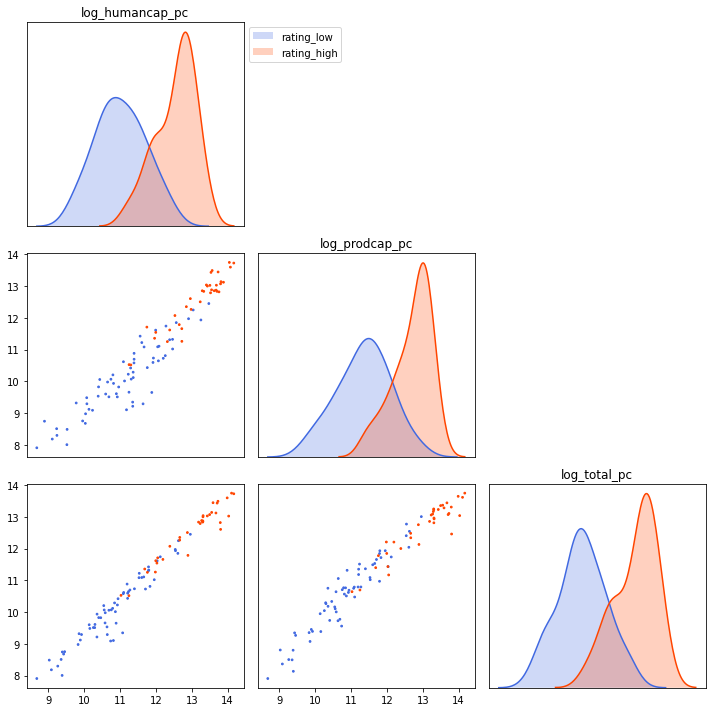

In [31]:
# Visualizing the relationship between the three features we want to use.
selected = ["log_humancap_pc","log_prodcap_pc","log_total_pc"]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_names)

In [32]:
# To rerun the classifications, we need to add the feature to the X array, which includes the values of all features.
X_2 = np.vstack((log_feature1, log_feature2, log_feature3)).T

In [33]:
rbf_clf_2 = SVC(kernel = 'rbf', gamma = 1.2)
rbf_clf_2 = rbf_clf_2.fit(X_2,y_true)
y_pred3 = rbf_clf_2.predict(X_2)
#print(plot_classification_contours(X_2, y_true, rbf_clf_2,["Human capital per capita (log)", "Produced capital per capita (log)","Total wealth (log)"]))

After having fitted the model and predicted the values based on our model with 3 features, we compute the confusion matrix and some performance metrics below to see if the model actually improved or not.

Normalized confusion matrix
[[0.80555556 0.19444444]
 [0.078125   0.921875  ]]


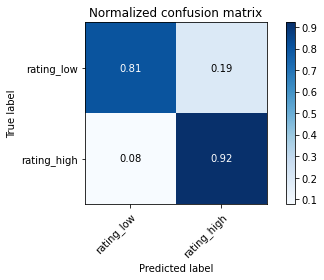

In [34]:
plot_confusion_matrix(y, y_pred3, label_names, normalize=True)

#### Does the third feature improve the predictions?
Based on the confusion matrix above, we can see that the performance of the model did not change at all. Thus adding the third feature did not improve our model. This might be due to the fact that the additional feature does not contain unique information, which the model can improve its classifications with, however we cannot draw a final conclusion as to why the predictions did not improve.

In [35]:
# We compute the precision and recall of our radial basis function model with 3 features to compare it to the model with 2 features.
precision_radial2 = precision(y_true, y_pred3)
print("The precision of our radial basis function model is: "+str(round(precision_radial2,4)))
recall_radial2 = recall(y_true, y_pred3)
print("The recall of our radial basis function model is: "+str(round(recall_radial2,4)))

The precision of our radial basis function model is: 0.8529
The recall of our radial basis function model is: 0.8056


Additionally, based on the computed performance metrics above, we can also see that the performance of the model did not improve by adding a third feature.

---

# Question 7
**10 points**

Finally, let us switch from a binary classification to a classification of three outcomes. This corresponds to the columns `cqs_group3`, where we have `rating_high`, `rating_medium` and `rating_low`.

In [36]:
# Initialize the variables we need to use.
target_name = 'cqs_group3'
sr_targets_2 = df_data.loc[:,target_name]

In [37]:
# Set up the label values and names for the three features.
label_values_2 = [1,2,3]
label_names_2 = ['rating_high', 'rating_mid', 'rating_low']

You can again use the 
```
selected = [feature1,feature2,feature3]
plot_pairwise_scatter(sr_targets, df_features.loc[:,selected], label_values)
```
command to visualize your data.

Inspect the classification results. Can you use the functions you defined previously to asses the results, or do you need to make adjustments? If so, do you have to completely rewrite the functions or are only minor adjustments necessary?

Bonus question
**10 points**
Compute the confusion matrix.  
Compute precision and recall for this case.

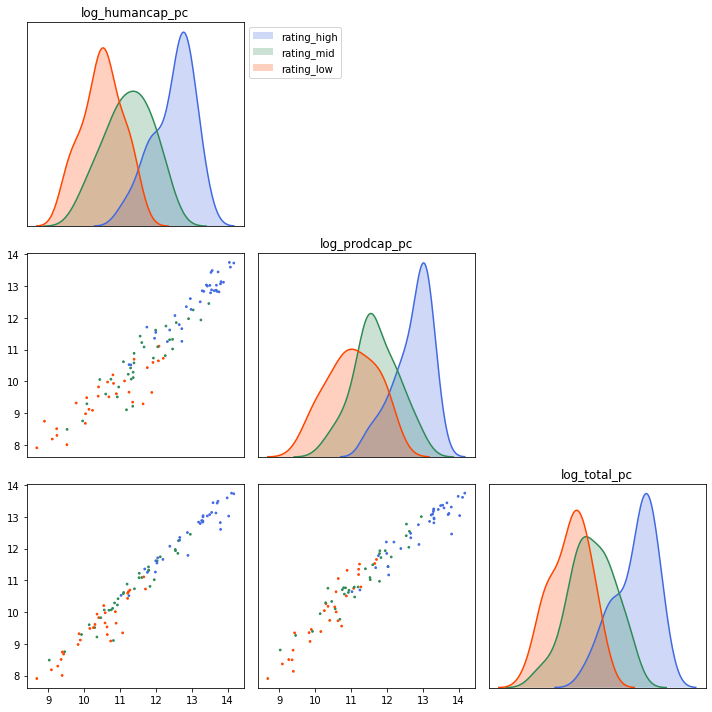

In [38]:
# Plot the relationship between the three features and three label names.
plot_pairwise_scatter(sr_targets_2, df_features.loc[:,selected], label_names_2)

The pairwise plot reveals a pattern that is to be expected, low rating countries seem to have lower values of total wealth, human capital and produced capital per capit, as opposed to mid and high rating countries. Additionally, the values for mid rating countries mostly lie between those of high and low rating countries, giving a very intuitive pattern. 

#### Are any adjustments necessary?
With regard to assessing the results using the functions we have defined, the interpretation of the true and false definitions in Q4 has changed since we now have three labels instead of two. Therefore we would need to create a whole set of additional functions to account for all the new possible outcomes.

### Bonus Question

In [39]:
# Fitting the model and making predictions for three labels.
y_true3 = np.array(sr_targets_2)
rbf_clf_3 = SVC(kernel = 'rbf', gamma = 1.2)
rbf_clf_3 = rbf_clf_3.fit(X_2,y_true3)
y_pred4 = rbf_clf_3.predict(X_2)

Normalized confusion matrix
[[0.80555556 0.19444444 0.        ]
 [0.14705882 0.55882353 0.29411765]
 [0.         0.16666667 0.83333333]]


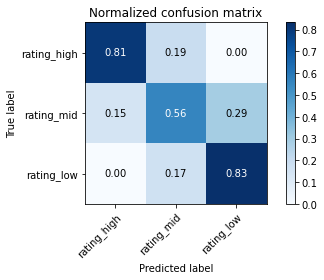

In [40]:
# Returning a confusion matrix of the predictions made by the model.
plot_confusion_matrix(y_true3, y_pred4, labels = label_names_2, normalize = True)

When inspecting the classification results, one can see that the true high rating ratio is at 0.81. In other words, our classification model correctly identifies a lower ratio of high ratings as it did with a binary classification. Our classification model also correctly identifies low ratings but with 0.83 it is more precise as with a binary classification. Since the correclty classified mid ratings only amount to 0.56, the model has problems classifying this outcome. It is noticeable, that our model wronlgy predicts mid ratings as low ratings much more often than any other combination. This leads to the assumption that our model is good in correctly predicting high ratings but is less exact in correctly predicting low and mid ratings since it has problems to correctly classify mid and low ratings.

Additionally, we can see that the model generally does not make very extreme wrong predictions, it does not falsely predict a rating to be low, when it is actually high and vice versa. This is to be expected, since these label values generally lie relatively far apart.

#### Computing precision and recall

In [41]:
# Importing the functions to compute precision and recall scores for the three feature model.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Computing the performance measurements for the final model.
precision_3 = precision_score(y_true3, y_pred4, label_values_2, average = None)
recall_3 = recall_score(y_true3, y_pred4, label_values_2, average = None)

C:\Users\maenn\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [42]:
print("The precision of high credit ratings is: "+str(round(precision_3[0],4)))
print("The precision of medium credit ratings is: "+str(round(precision_3[1],4)))
print("The precision of low credit ratings is: "+str(round(precision_3[2],4))+'\n')

print("The recall of high credit ratings is: "+str(round(recall_3[0],4)))
print("The recall of medium credit ratings is: "+str(round(recall_3[1],4)))
print("The recall of low credit ratings is: "+str(round(recall_3[2],4)))

The precision of high credit ratings is: 0.8529
The precision of medium credit ratings is: 0.6129
The precision of low credit ratings is: 0.7143

The recall of high credit ratings is: 0.8056
The recall of medium credit ratings is: 0.5588
The recall of low credit ratings is: 0.8333


The precision and recall scores again show us that the model has trouble predicting the medium ratings, while it does well in predicting low and high ratings. Which is consistent with what we observed in the confusion matrix.

---